# Principal Component Analysis with Cancer Data

In [34]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file into Python DataFrame and view top 10 rows

In [35]:
cancer_df=pd.read_csv("cancer.csv")
cancer_df.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [36]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done
cancer=cancer_df.drop(labels="ID", axis=1)

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [37]:
#data types
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [50]:
#shape
cancer.shape

(699, 10)

In [51]:
cancer.describe()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.601852,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [0]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column

In [38]:
cancer.isna().sum()

ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [39]:
cancer['Bare Nuclei']

0       1
1      10
2       2
3       4
4       1
5      10
6      10
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      9
15      1
16      1
17      1
18     10
19      1
20     10
21      7
22      1
23      ?
24      1
25      7
26      1
27      1
28      1
29      1
       ..
669     5
670     8
671     1
672     1
673     1
674     1
675     1
676     1
677     1
678     1
679     1
680    10
681    10
682     1
683     1
684     1
685     1
686     1
687     1
688     1
689     1
690     1
691     5
692     1
693     1
694     2
695     1
696     3
697     4
698     5
Name: Bare Nuclei, Length: 699, dtype: object

In [40]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?
temp = pd.DataFrame(cancer['Bare Nuclei'].str.isdigit())  # if the string is made of digits store True else False  in the hp column 
tp = temp[temp['Bare Nuclei'] == False]   # from temp take only those rows where hp has false
tp.count()

Bare Nuclei    16
dtype: int64

In [47]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

cancer['Bare Nuclei'] = cancer['Bare Nuclei'].replace('?', np.nan)
#cancer['Bare Nuclei'] = cancer['Bare Nuclei'].replace(np.nan, cancer['Bare Nuclei'].mean())
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].astype('float64')

In [43]:
cancer['Bare Nuclei']

0        1
1       10
2        2
3        4
4        1
5       10
6       10
7        1
8        1
9        1
10       1
11       1
12       3
13       3
14       9
15       1
16       1
17       1
18      10
19       1
20      10
21       7
22       1
23     NaN
24       1
25       7
26       1
27       1
28       1
29       1
      ... 
669      5
670      8
671      1
672      1
673      1
674      1
675      1
676      1
677      1
678      1
679      1
680     10
681     10
682      1
683      1
684      1
685      1
686      1
687      1
688      1
689      1
690      1
691      5
692      1
693      1
694      2
695      1
696      3
697      4
698      5
Name: Bare Nuclei, Length: 699, dtype: object

In [48]:
cancer['Bare Nuclei'] = cancer['Bare Nuclei'].replace(np.NaN, cancer['Bare Nuclei'].mean())

In [49]:
cancer['Bare Nuclei'] 

0       1.000000
1      10.000000
2       2.000000
3       4.000000
4       1.000000
5      10.000000
6      10.000000
7       1.000000
8       1.000000
9       1.000000
10      1.000000
11      1.000000
12      3.000000
13      3.000000
14      9.000000
15      1.000000
16      1.000000
17      1.000000
18     10.000000
19      1.000000
20     10.000000
21      7.000000
22      1.000000
23      3.544656
24      1.000000
25      7.000000
26      1.000000
27      1.000000
28      1.000000
29      1.000000
         ...    
669     5.000000
670     8.000000
671     1.000000
672     1.000000
673     1.000000
674     1.000000
675     1.000000
676     1.000000
677     1.000000
678     1.000000
679     1.000000
680    10.000000
681    10.000000
682     1.000000
683     1.000000
684     1.000000
685     1.000000
686     1.000000
687     1.000000
688     1.000000
689     1.000000
690     1.000000
691     5.000000
692     1.000000
693     1.000000
694     2.000000
695     1.000000
696     3.0000

# Q4. Perform bi variate analysis including correlation & pairplots. 


In [0]:
# Check for correlation of variable

In [52]:
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
# To enable plotting graphs in Jupyter notebook
%matplotlib inline 

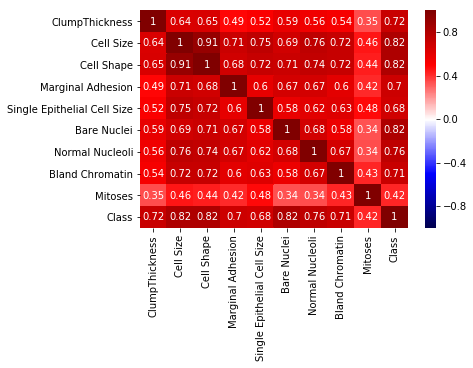

In [53]:
sns.heatmap(cancer.corr(), annot=True, vmin=-1, vmax=1, cmap='seismic')

In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [0]:
#Let us check for pair plots

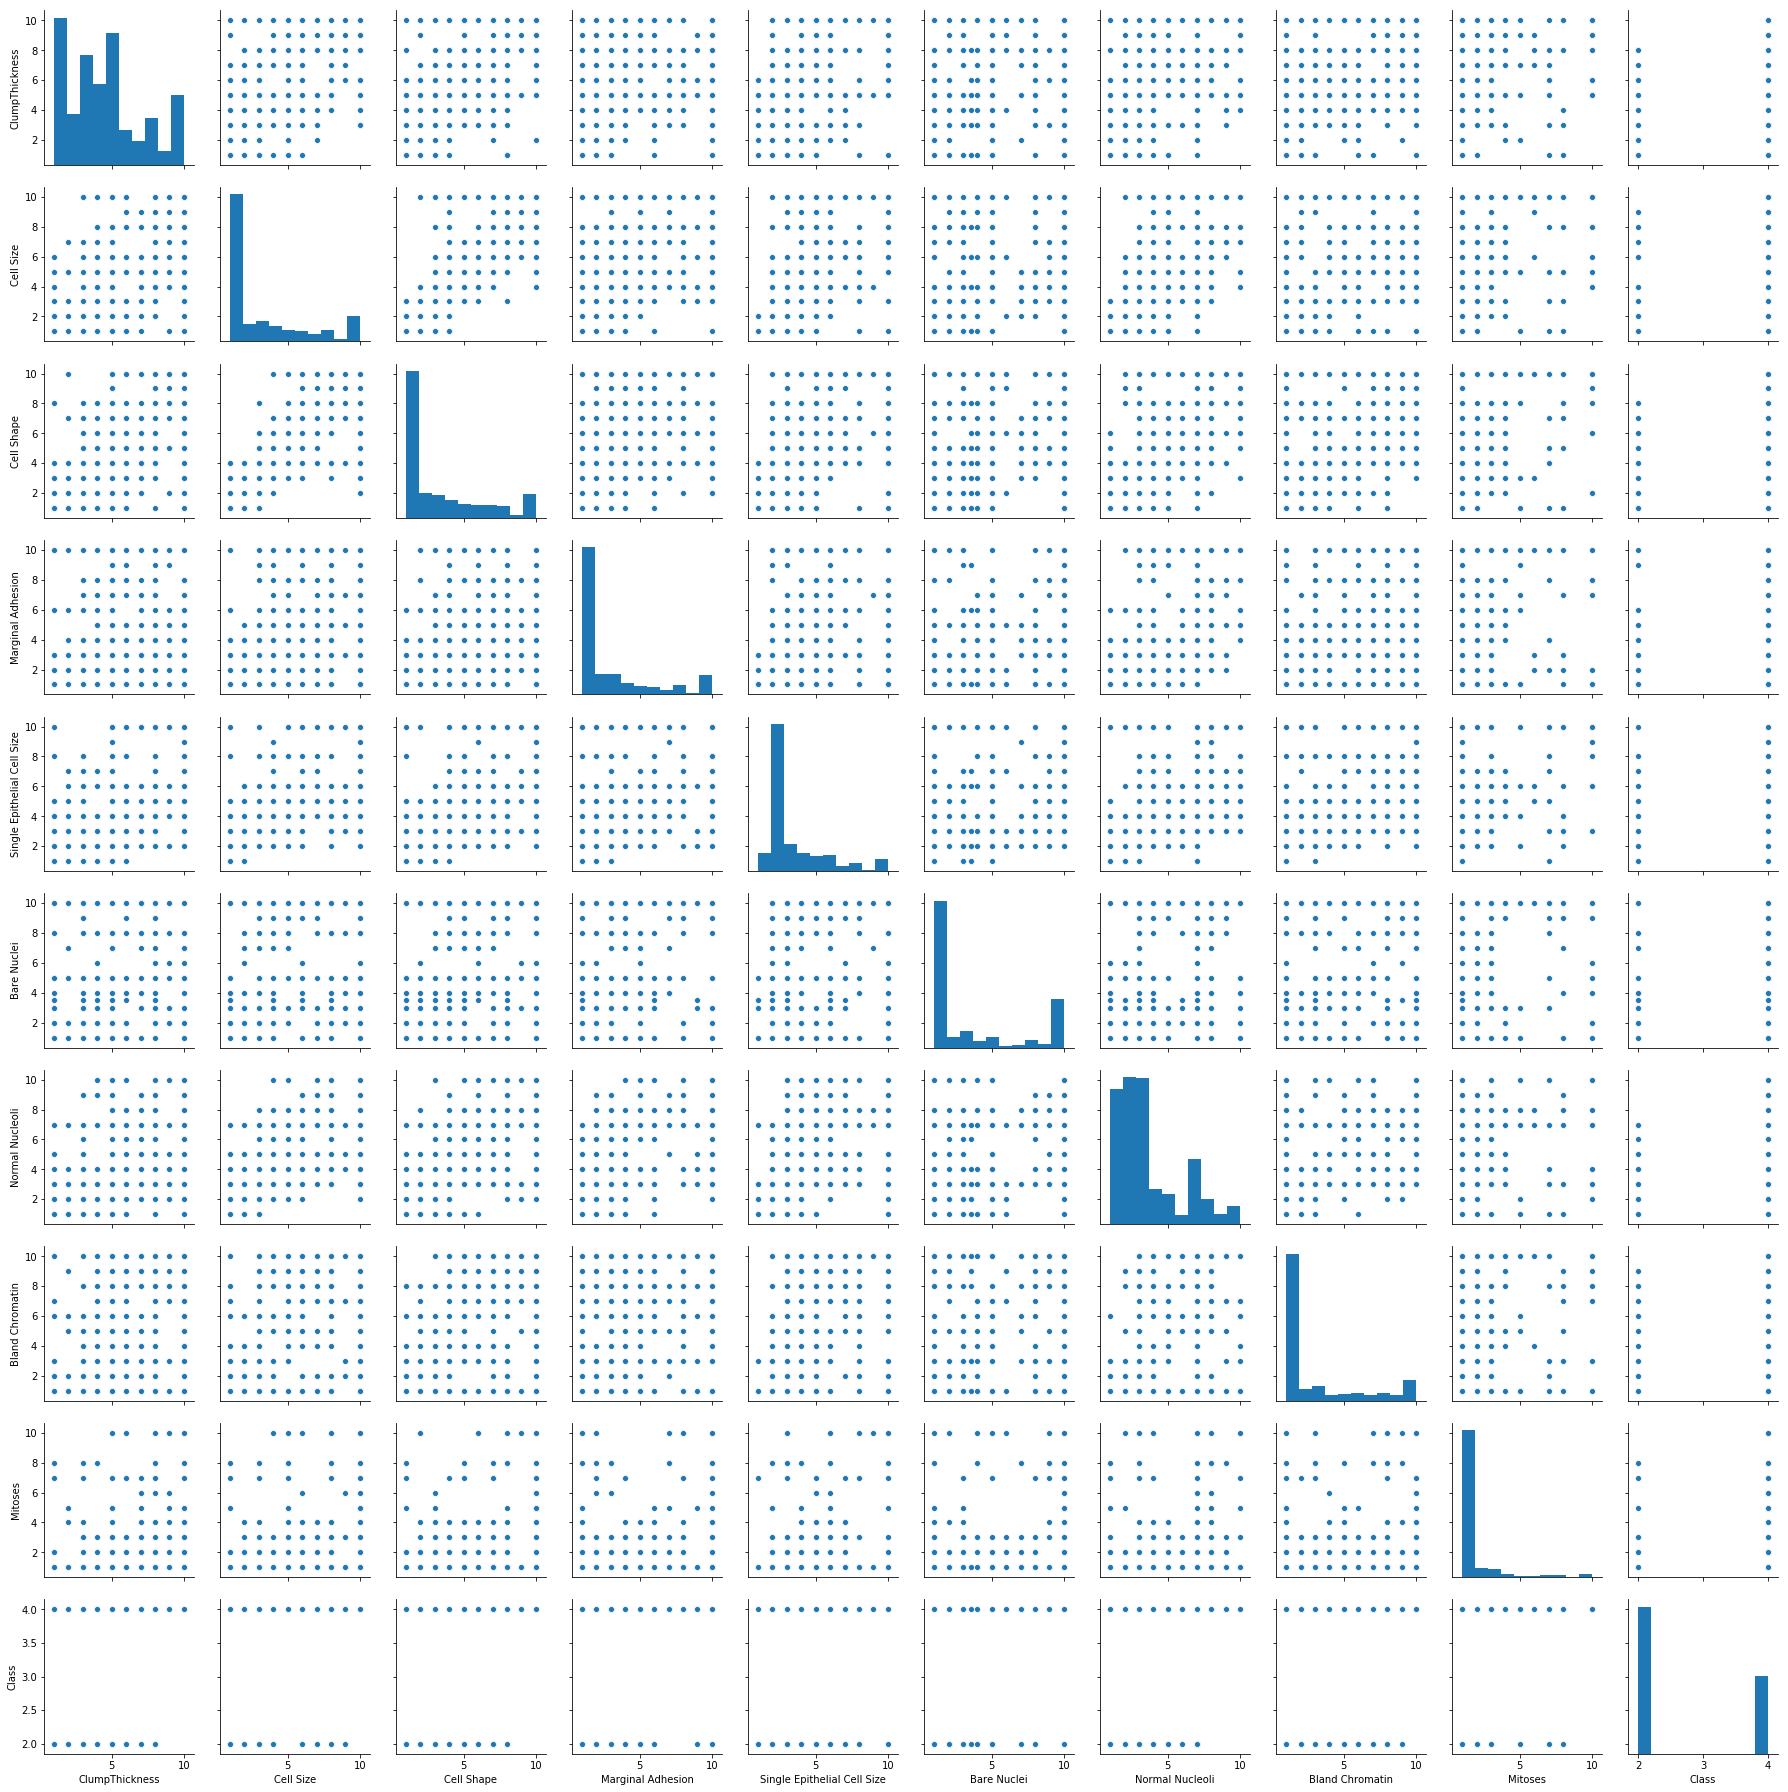

In [54]:
# Pairplot using sns
sns.pairplot(cancer)

# Q5 Remove any unwanted columns or outliers, standardize variables in this pre-processing step

In [0]:
# We could see most of the outliers are now removed.

In [57]:
X=cancer.drop(labels='Class', axis=1)
y=cancer['Class']

In [58]:
from sklearn.model_selection  import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std =  sc.fit_transform(xtrain)          


C:\Users\swapn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\swapn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [0]:
# PCA
# Step 1 - Create covariance matrix


In [61]:
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00204918 0.64102192 0.63957098 0.49973405 0.53961714 0.55997361
  0.57007799 0.53014732 0.35404426]
 [0.64102192 1.00204918 0.90650778 0.71804567 0.7393648  0.66987837
  0.76333879 0.73129147 0.45019272]
 [0.63957098 0.90650778 1.00204918 0.69819309 0.71657106 0.69081508
  0.73035171 0.72174011 0.41361142]
 [0.49973405 0.71804567 0.69819309 1.00204918 0.61482228 0.67731214
  0.67817737 0.61103297 0.45472222]
 [0.53961714 0.7393648  0.71657106 0.61482228 1.00204918 0.5901629
  0.61734429 0.64403751 0.50455831]
 [0.55997361 0.66987837 0.69081508 0.67731214 0.5901629  1.00204918
  0.65878595 0.59240621 0.34385968]
 [0.57007799 0.76333879 0.73035171 0.67817737 0.61734429 0.65878595
  1.00204918 0.67107442 0.33895482]
 [0.53014732 0.73129147 0.72174011 0.61103297 0.64403751 0.59240621
  0.67107442 1.00204918 0.41140139]
 [0.35404426 0.45019272 0.41361142 0.45472222 0.50455831 0.34385968
  0.33895482 0.41140139 1.00204918]]


# Q7 Identify eigen values and eigen vector

In [0]:
# Step 2- Get eigen values and eigen vector

In [62]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-0.30128167 -0.11942239  0.88259874  0.00174873  0.19706261 -0.24884121
   0.04957073  0.10919001 -0.02913266]
 [-0.37968512 -0.07863872 -0.00160225 -0.74103816 -0.21822744  0.35409472
   0.20076289 -0.07533451 -0.28553061]
 [-0.37434571 -0.12738506  0.01763981  0.65819193 -0.19006277  0.46319436
   0.32571736 -0.12621256 -0.19343287]
 [-0.33889414  0.01712555 -0.39697282  0.03175323  0.4162334  -0.52454151
   0.38304763  0.07698892 -0.35385726]
 [-0.33885584  0.18730758 -0.01728123  0.03677688 -0.33197699 -0.38140153
  -0.26818207 -0.71668148  0.0849211 ]
 [-0.32998235 -0.20516826 -0.14096374 -0.07627109  0.58651739  0.28053977
  -0.0888583  -0.21614581  0.58822577]
 [-0.34585034 -0.24151366 -0.15137308  0.09312384 -0.00419568  0.02966956
  -0.76183339  0.34440199 -0.30095201]
 [-0.33752953 -0.03975552 -0.1318296  -0.00629908 -0.47646428 -0.22975234
   0.18668439  0.49125893  0.5577489 ]
 [-0.22985721  0.908816    0.05153682  0.02743991  0.15139955  0.21252308
  -0

# Q8 Find variance and cumulative variance by each eigen vector

In [63]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.905366303051535, array([-0.30128167, -0.37968512, -0.37434571, -0.33889414, -0.33885584,
       -0.32998235, -0.34585034, -0.33752953, -0.22985721])), (0.7854562399069315, array([-0.11942239, -0.07863872, -0.12738506,  0.01712555,  0.18730758,
       -0.20516826, -0.24151366, -0.03975552,  0.908816  ])), (0.5326122101382691, array([ 0.88259874, -0.00160225,  0.01763981, -0.39697282, -0.01728123,
       -0.14096374, -0.15137308, -0.1318296 ,  0.05153682])), (0.46651683286450224, array([ 0.19706261, -0.21822744, -0.19006277,  0.4162334 , -0.33197699,
        0.58651739, -0.00419568, -0.47646428,  0.15139955])), (0.3563239773812937, array([ 0.10919001, -0.07533451, -0.12621256,  0.07698892, -0.71668148,
       -0.21614581,  0.34440199,  0.49125893,  0.20061388])), (0.33066878298884406, array([-0.02913266, -0.28553061, -0.19343287, -0.35385726,  0.0849211 ,
        0.58822577, -0.30095201,  0.5577489 ,  0.01073392])), (0.28331363266681237, array([ 0.04957073,  0.20076289,  0.32571736, 

In [67]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%


ValueError: shape mismatch: objects cannot be broadcast to a single shape

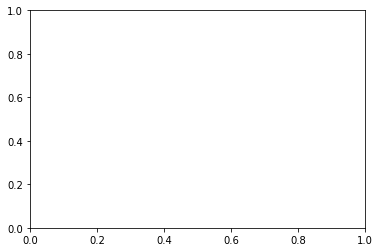

In [69]:
from sklearn.decomposition import PCA
from scipy.stats import zscore
plt.bar(range(1,8), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,8),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [70]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:4])   # Reducing from 8 to 4 dimension space

X_std_4D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_4D)  # converting array to dataframe for pairplot

# Q10 Find correlation between components and features

In [72]:
from sklearn import model_selection

test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(Proj_data_df, y, test_size=test_size, random_state=seed)

ValueError: Found input variables with inconsistent numbers of samples: [489, 699]